# Final project


Dataset name: AMES, House Prices dataset

Documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

Related publication article: http://jse.amstat.org/v19n3/decock.pdf

Related Kaggle challenge: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Objective and what you are expected to do

The dataset is considered as a standard for regression, see for instance the related Kaggle challenge. The generic task is to predict the house Price based on the features of the house.

Aside from classic exploratory data analysis and a classic linear model for prediction, their are many approaches that can be tried out on this dataset: (not ranked)
- Identifying most pertinent variables for target prediction
- Cleaning issues and Missing data: removing observations, columns, imputing cells
- Prediction algorithms
- Hyperparameter optimization
- Explaining predictions obtained
- Clustering houses
- Dimension reduction of the features matrix

About the scientific part, you should pay a specific attention to:

- Resampling issues
- Statistical modelling issues (2 points for the explanations, use Latex!)
- Optimization issues (2 points for the description of the mathematical resolution, use Latex!)


You shall divide in groups of 2 persons maximum, and explore the leads which you deem most interesting.

You are asked to produce a report with a notebook + a pdf file for the mathematical and statistical descriptions.

It is mandatory to explain each algorithm you use to deal with the datascience problem.

*You have to upload your files before friday, 29 of december, 18h00.*

Good luck !

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Basic functions
import numpy as np

# Handling dataframes
import pandas

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Explainability
! pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.5 MB/s eta 0:00:00


# Data import 📥

In [2]:
# data is freely available at the following url:
# you might want to download the file so as to not be wifi dependent!
data_path = "http://jse.amstat.org/v19n3/decock/AmesHousing.txt"

In [3]:
# read data
my_data = pandas.read_table(data_path)

In [4]:
# change display output
pandas.set_option('display.max_columns', 100)

# first five rows, quick check
my_data.head(n = 5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Quick analysis

In [5]:
# quick look
my_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
# change display options
pandas.options.display.max_rows = 100

# print types of variables
my_data.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

<Axes: xlabel='SalePrice', ylabel='Count'>

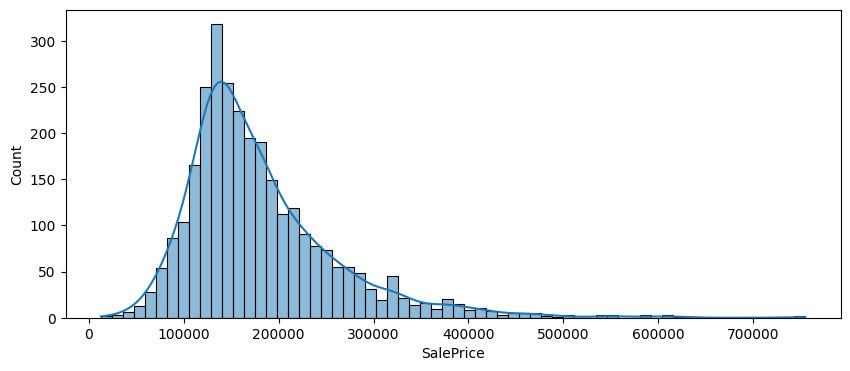

In [ ]:
# Sale Price histogram
plt.figure(figsize=(10, 4))
sns.histplot(my_data['SalePrice'], kde=True)

In [ ]:
# Number of NaN values by Variable
my_data.isna().sum().to_frame().T

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,0,0,0,490,0,0,2732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,0,0,0,80,80,83,80,1,81,1,1,1,0,0,0,1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1422,157,159,159,1,1,159,159,0,0,0,0,0,0,0,2917,2358,2824,0,0,0,0,0,0


# Data Exploration 🔎

## Area related Variables

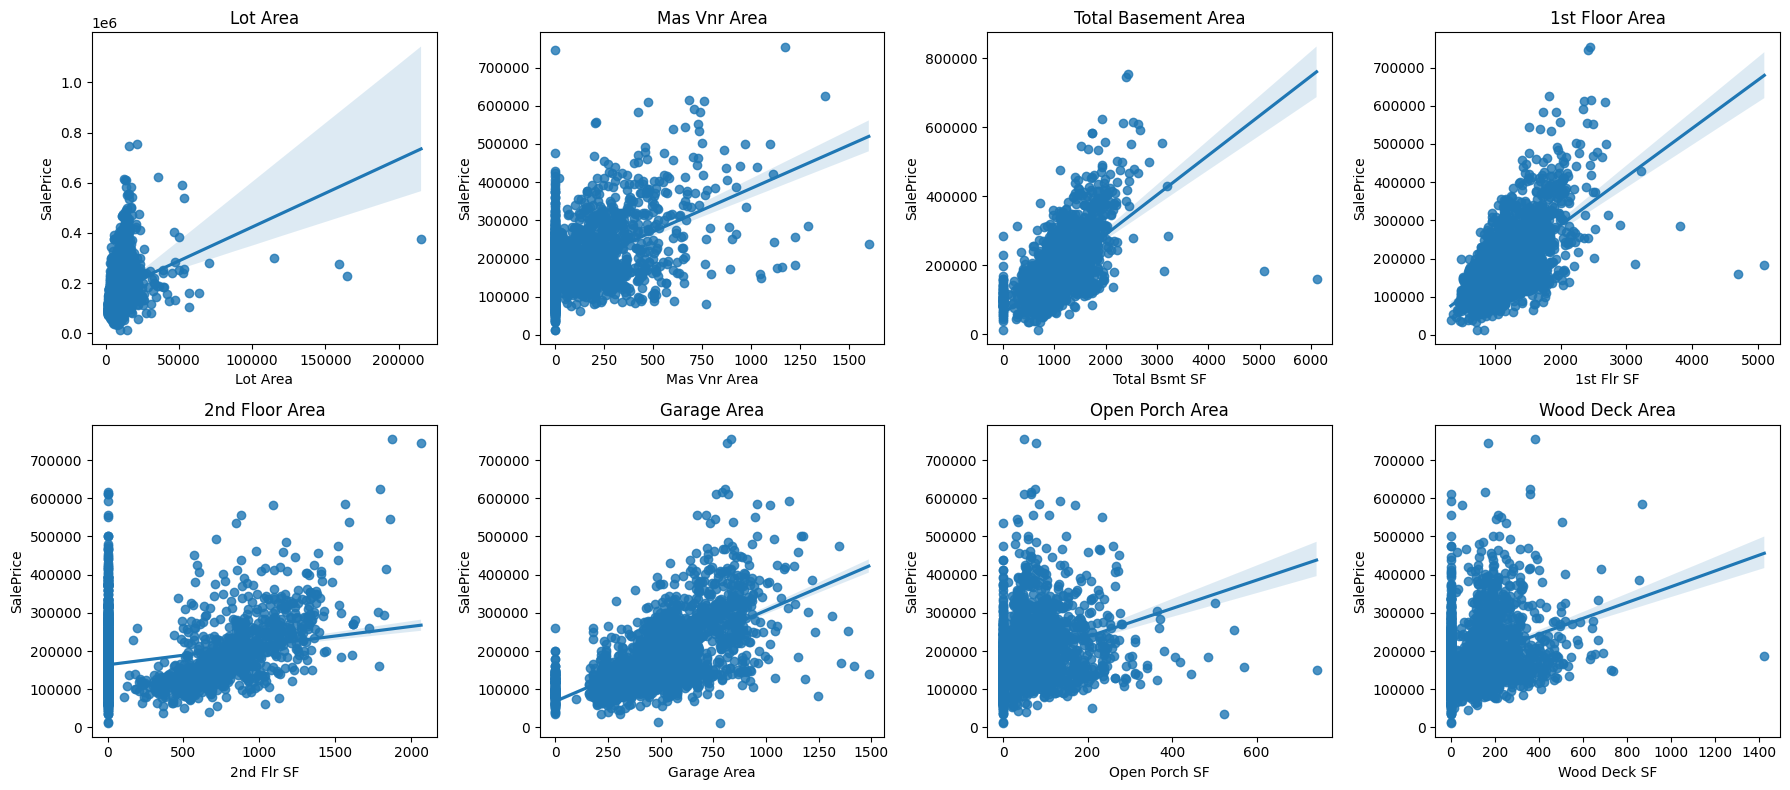

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))

# Scatterplots on each subplot
sns.regplot(data=my_data, x='Lot Area', y='SalePrice', ax=axes[0, 0])
axes[0, 0].set_title('Lot Area')

sns.regplot(data=my_data, x='Mas Vnr Area', y='SalePrice', ax=axes[0, 1])
axes[0, 1].set_title('Mas Vnr Area')

sns.regplot(data=my_data, x='Total Bsmt SF', y='SalePrice', ax=axes[0, 2])
axes[0, 2].set_title('Total Basement Area')

sns.regplot(data=my_data, x='1st Flr SF', y='SalePrice', ax=axes[0, 3])
axes[0, 3].set_title('1st Floor Area')

sns.regplot(data=my_data, x='2nd Flr SF', y='SalePrice', ax=axes[1, 0])
axes[1, 0].set_title('2nd Floor Area')

sns.regplot(data=my_data, x='Garage Area', y='SalePrice', ax=axes[1, 1])
axes[1, 1].set_title('Garage Area')

sns.regplot(data=my_data, x='Open Porch SF', y='SalePrice', ax=axes[1, 2])
axes[1, 2].set_title('Open Porch Area')

sns.regplot(data=my_data, x='Wood Deck SF', y='SalePrice', ax=axes[1, 3])
axes[1, 3].set_title('Wood Deck Area')

# Adjusting layout
plt.tight_layout()

# Displaying the figure
plt.show()

## Quality and Condition Related Variables

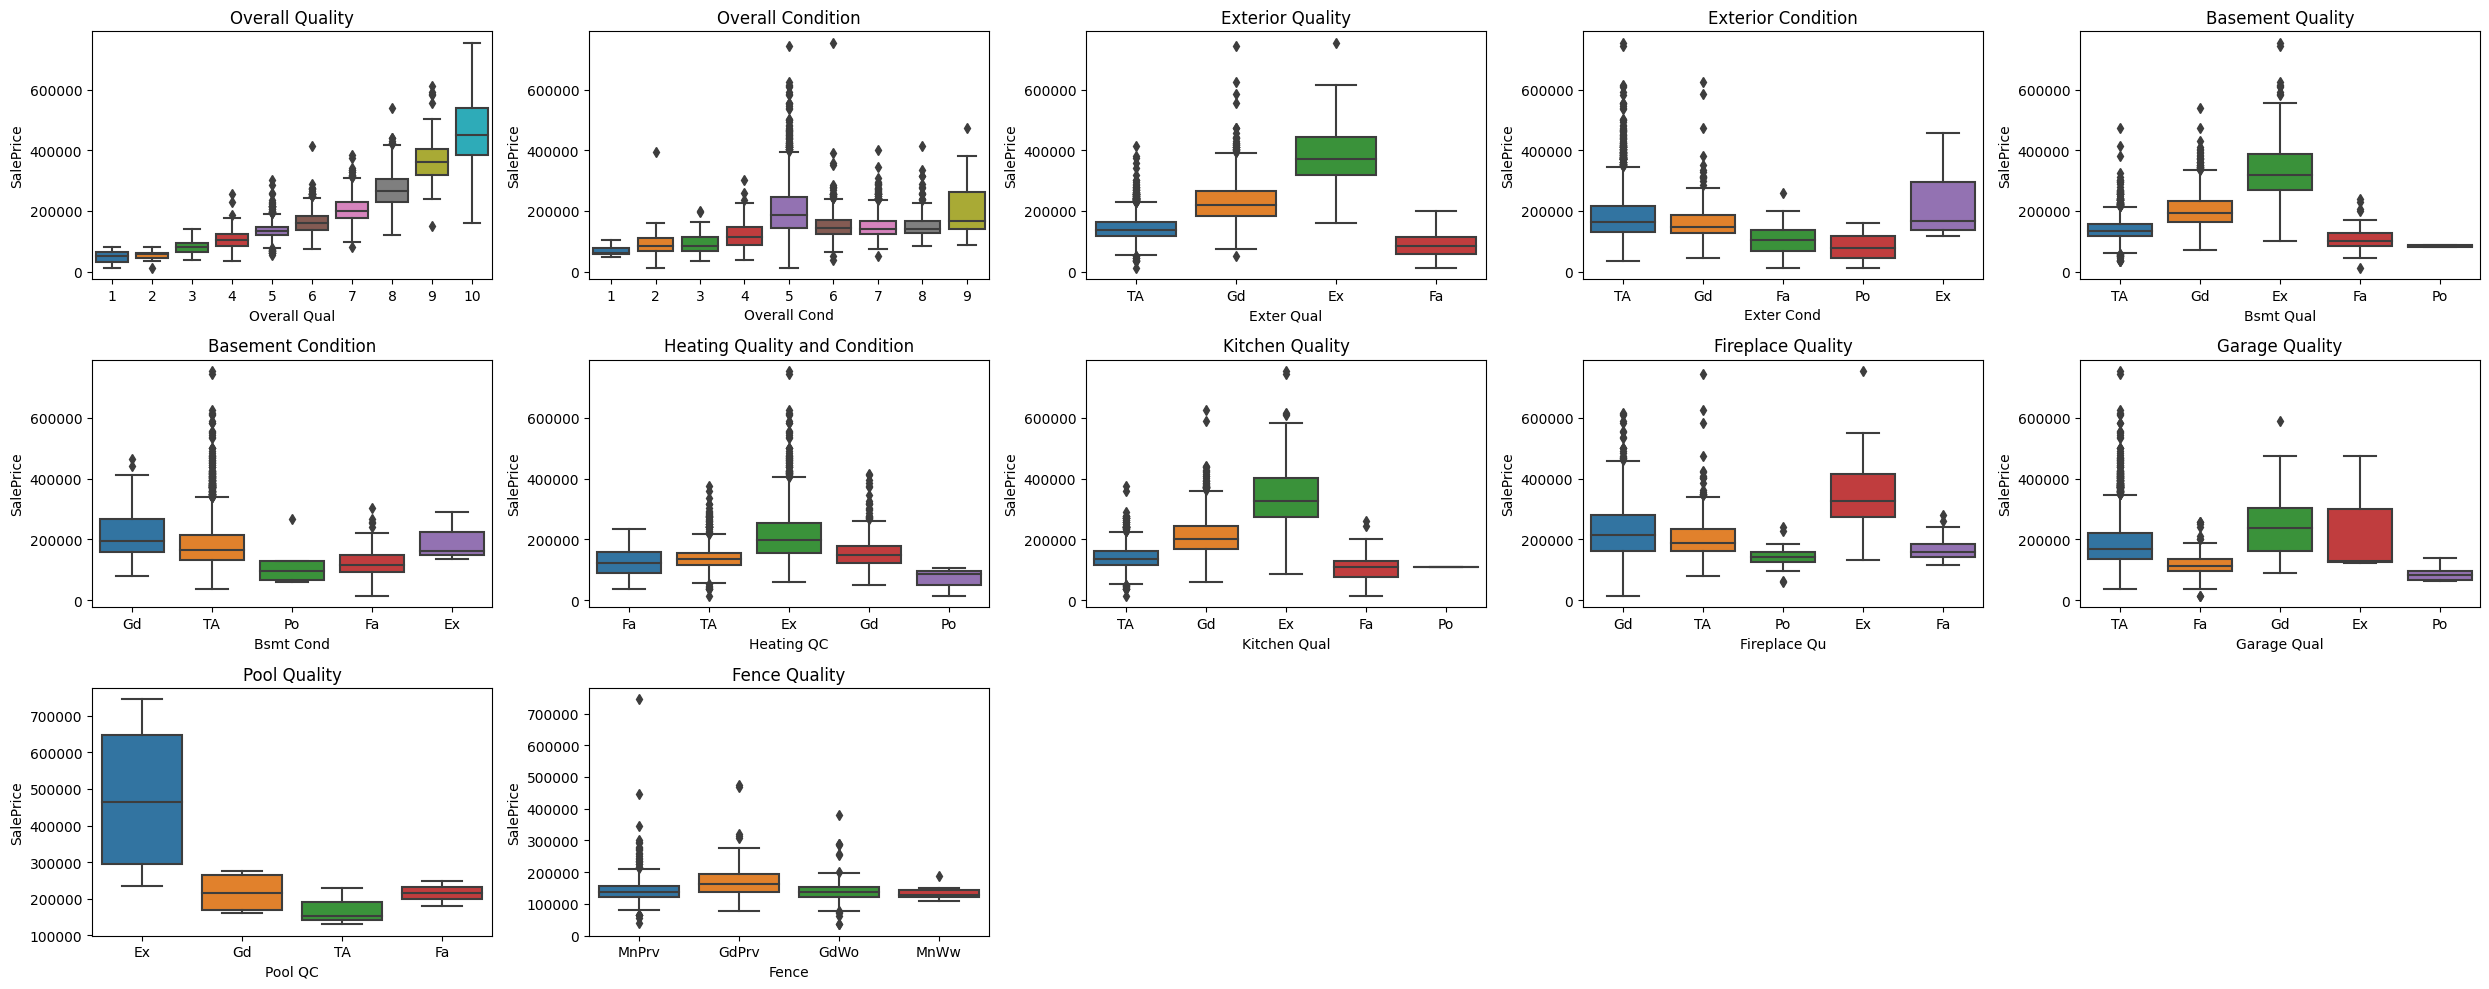

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))

sns.boxplot(data=my_data, x='Overall Qual', y='SalePrice', ax=axes[0, 0])
axes[0, 0].set_title('Overall Quality')

sns.boxplot(data=my_data, x='Overall Cond', y='SalePrice', ax=axes[0, 1])
axes[0, 1].set_title('Overall Condition')

sns.boxplot(data=my_data, x='Exter Qual', y='SalePrice', ax=axes[0, 2])
axes[0, 2].set_title('Exterior Quality')

sns.boxplot(data=my_data, x='Exter Cond', y='SalePrice', ax=axes[0, 3])
axes[0, 3].set_title('Exterior Condition')

sns.boxplot(data=my_data, x='Bsmt Qual', y='SalePrice', ax=axes[0, 4])
axes[0, 4].set_title('Basement Quality')

sns.boxplot(data=my_data, x='Bsmt Cond', y='SalePrice', ax=axes[1, 0])
axes[1, 0].set_title('Basement Condition')

sns.boxplot(data=my_data, x='Heating QC', y='SalePrice', ax=axes[1, 1])
axes[1, 1].set_title('Heating Quality and Condition')

sns.boxplot(data=my_data, x='Kitchen Qual', y='SalePrice', ax=axes[1, 2])
axes[1, 2].set_title('Kitchen Quality')

sns.boxplot(data=my_data, x='Fireplace Qu', y='SalePrice', ax=axes[1, 3])
axes[1, 3].set_title('Fireplace Quality')

sns.boxplot(data=my_data, x='Garage Qual', y='SalePrice', ax=axes[1, 4])
axes[1, 4].set_title('Garage Quality')

sns.boxplot(data=my_data, x='Pool QC', y='SalePrice', ax=axes[2, 0])
axes[2, 0].set_title('Pool Quality')

sns.boxplot(data=my_data, x='Fence', y='SalePrice', ax=axes[2, 1])
axes[2, 1].set_title('Fence Quality')

fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])
fig.delaxes(axes[2, 4])

plt.tight_layout()

plt.show()

## Street / Alley

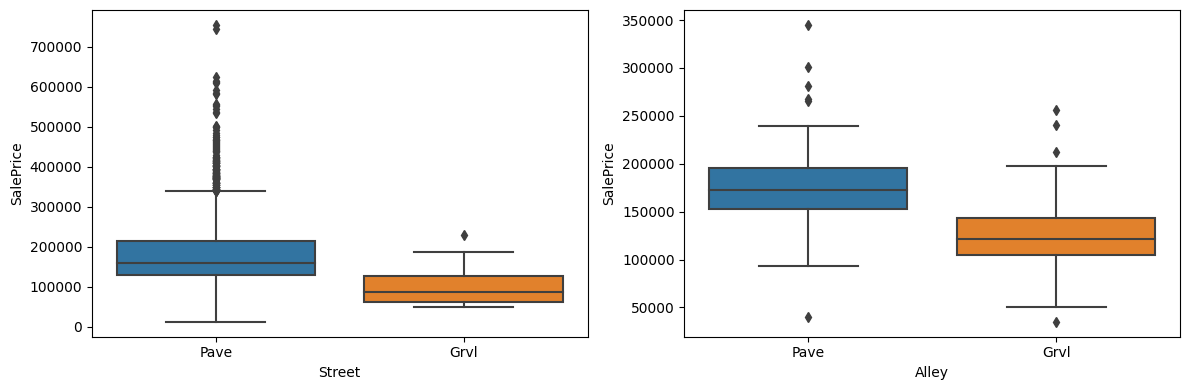

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=my_data, x='Street', y='SalePrice')

plt.subplot(1, 2, 2)
sns.boxplot(data=my_data, x='Alley', y='SalePrice')

plt.tight_layout()
plt.show()

## Equipments

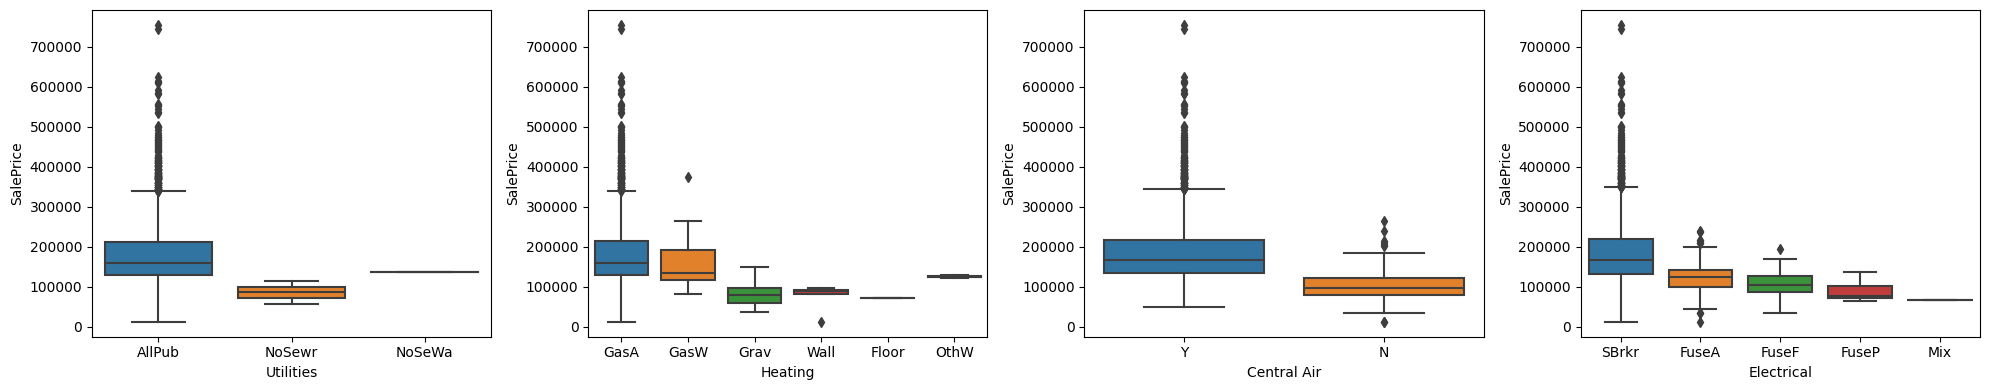

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
sns.boxplot(data=my_data, x='Utilities', y='SalePrice')

plt.subplot(1, 4, 2)
sns.boxplot(data=my_data, x='Heating', y='SalePrice')

plt.subplot(1, 4, 3)
sns.boxplot(data=my_data, x='Central Air', y='SalePrice')

plt.subplot(1, 4, 4)
sns.boxplot(data=my_data, x='Electrical', y='SalePrice')

plt.tight_layout()
plt.show()

## House Lot / Shape / Slope

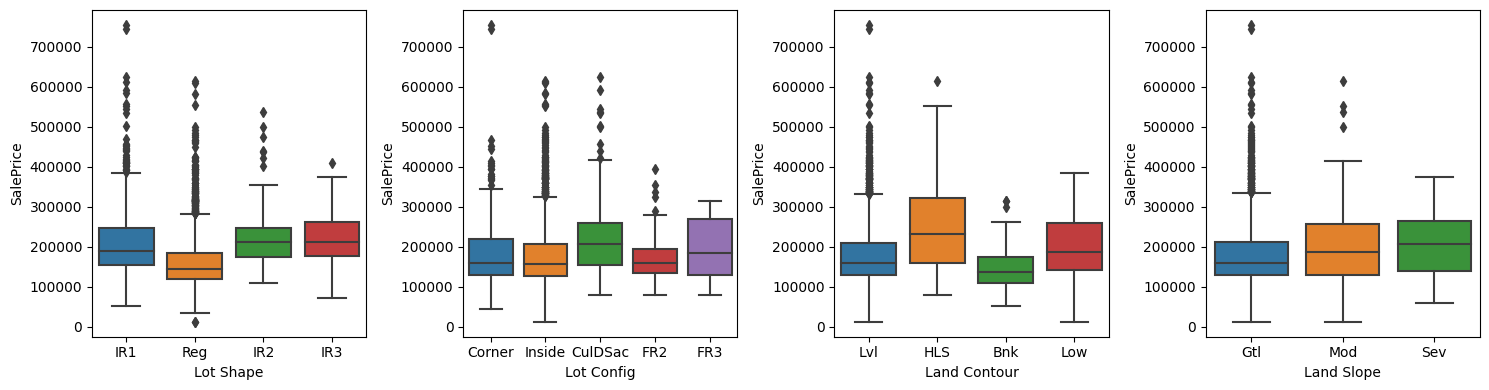

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.boxplot(data=my_data, x='Lot Shape', y='SalePrice')

plt.subplot(1, 4, 2)
sns.boxplot(data=my_data, x='Lot Config', y='SalePrice')

plt.subplot(1, 4, 3)
sns.boxplot(data=my_data, x='Land Contour', y='SalePrice')

plt.subplot(1, 4, 4)
sns.boxplot(data=my_data, x='Land Slope', y='SalePrice')

plt.tight_layout()
plt.show()

## Environment Around the House

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

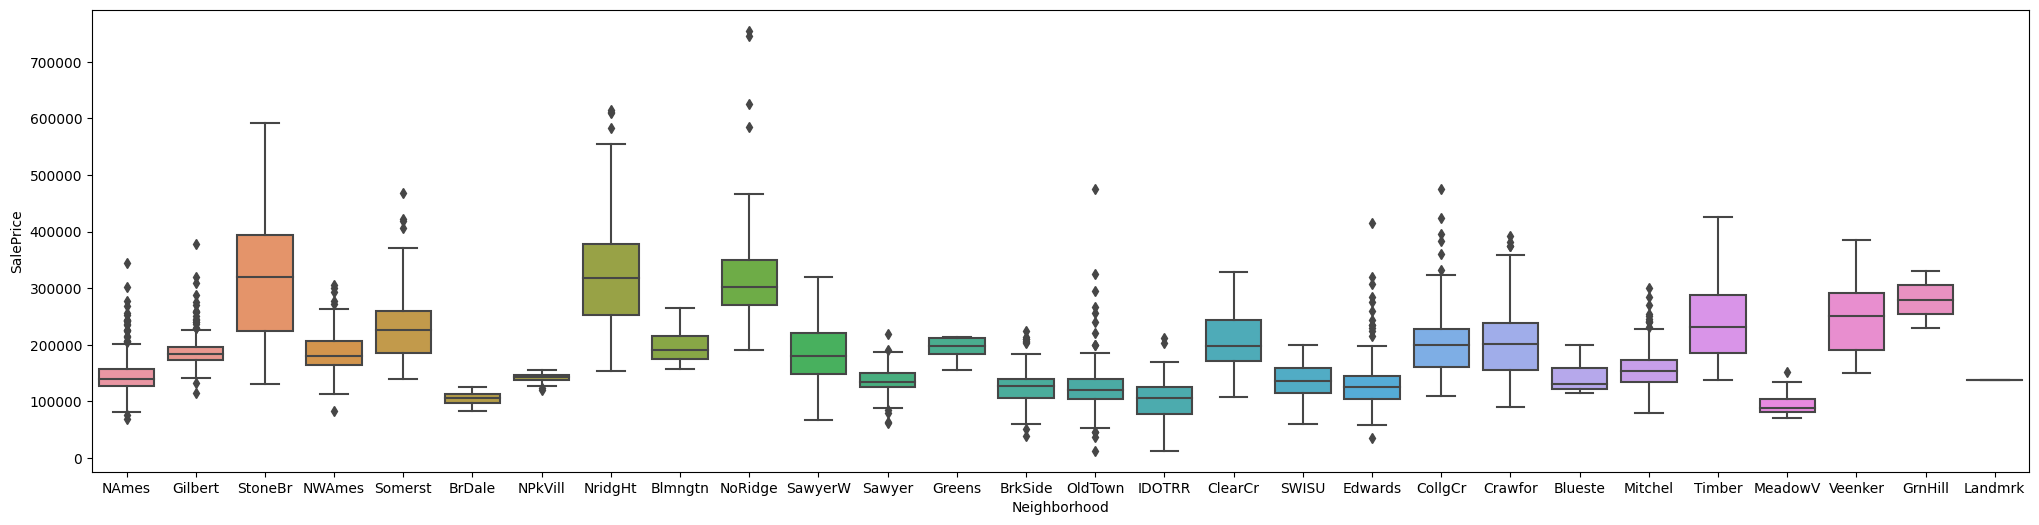

In [ ]:
# Neigborhood
plt.figure(figsize=(25, 6))
sns.boxplot(data=my_data, x='Neighborhood', y='SalePrice')

Norm      2900
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

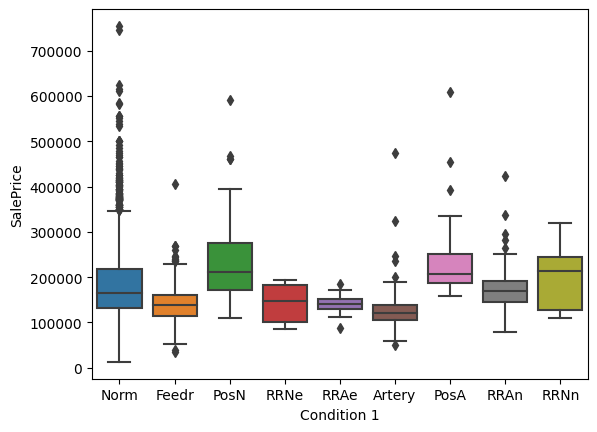

In [ ]:
# Condition 1 & 2 Variables Analysis -- > Delete Condition2 ?
sns.boxplot(data=my_data, x='Condition 1', y='SalePrice')
my_data['Condition 2'].value_counts()

## Type of Building

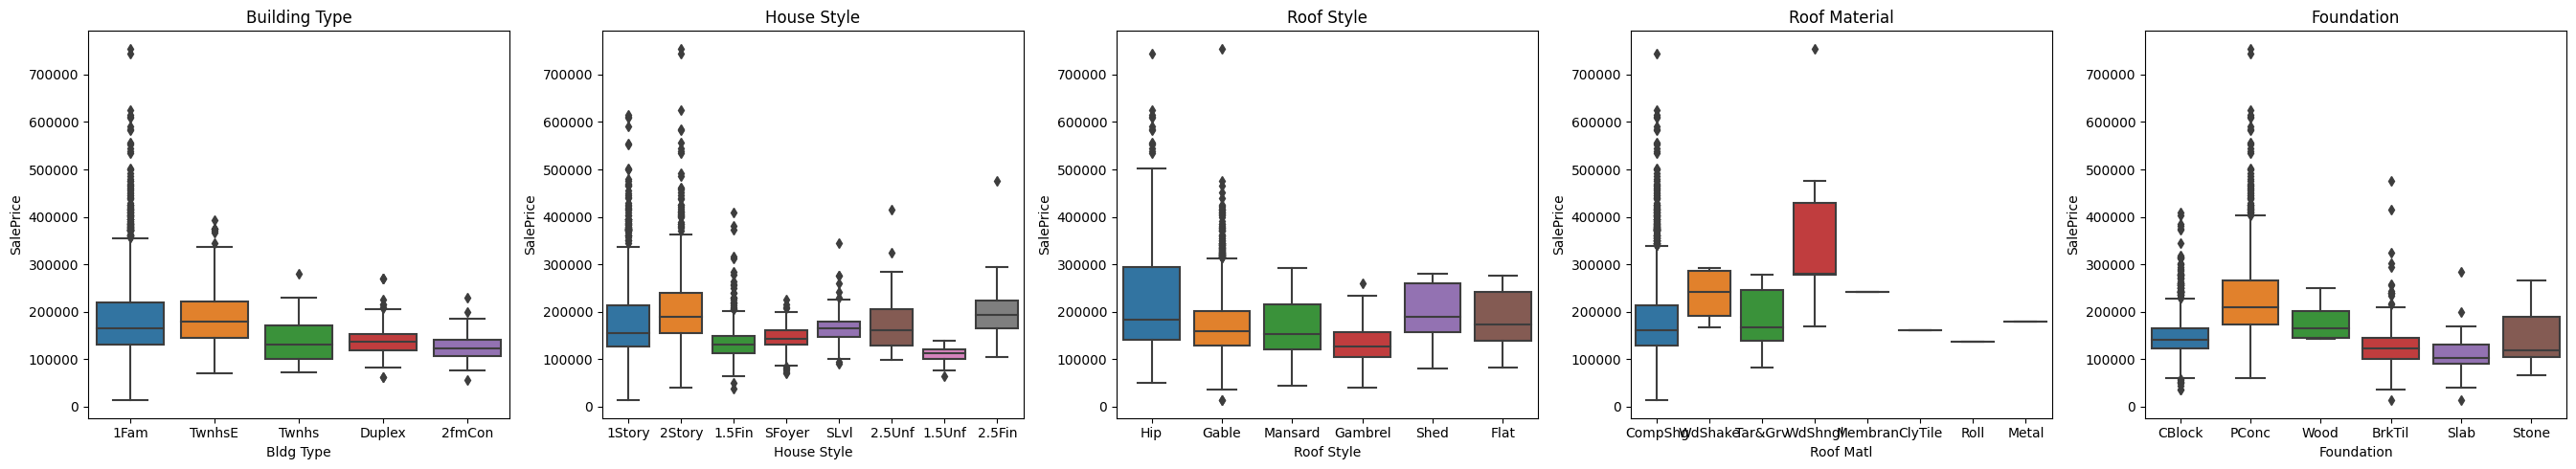

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(27, 5))

sns.boxplot(data=my_data, x='Bldg Type', y='SalePrice', ax=axes[0])
axes[0].set_title('Building Type')

sns.boxplot(data=my_data, x='House Style', y='SalePrice', ax=axes[1])
axes[1].set_title('House Style')

sns.boxplot(data=my_data, x='Roof Style', y='SalePrice', ax=axes[2])
axes[2].set_title('Roof Style')

sns.boxplot(data=my_data, x='Roof Matl', y='SalePrice', ax=axes[3])
axes[3].set_title('Roof Material')

sns.boxplot(my_data, x='Foundation', y='SalePrice', ax=axes[4])
axes[4].set_title('Foundation')

plt.tight_layout()

plt.show()

## Age and Renovations of the House

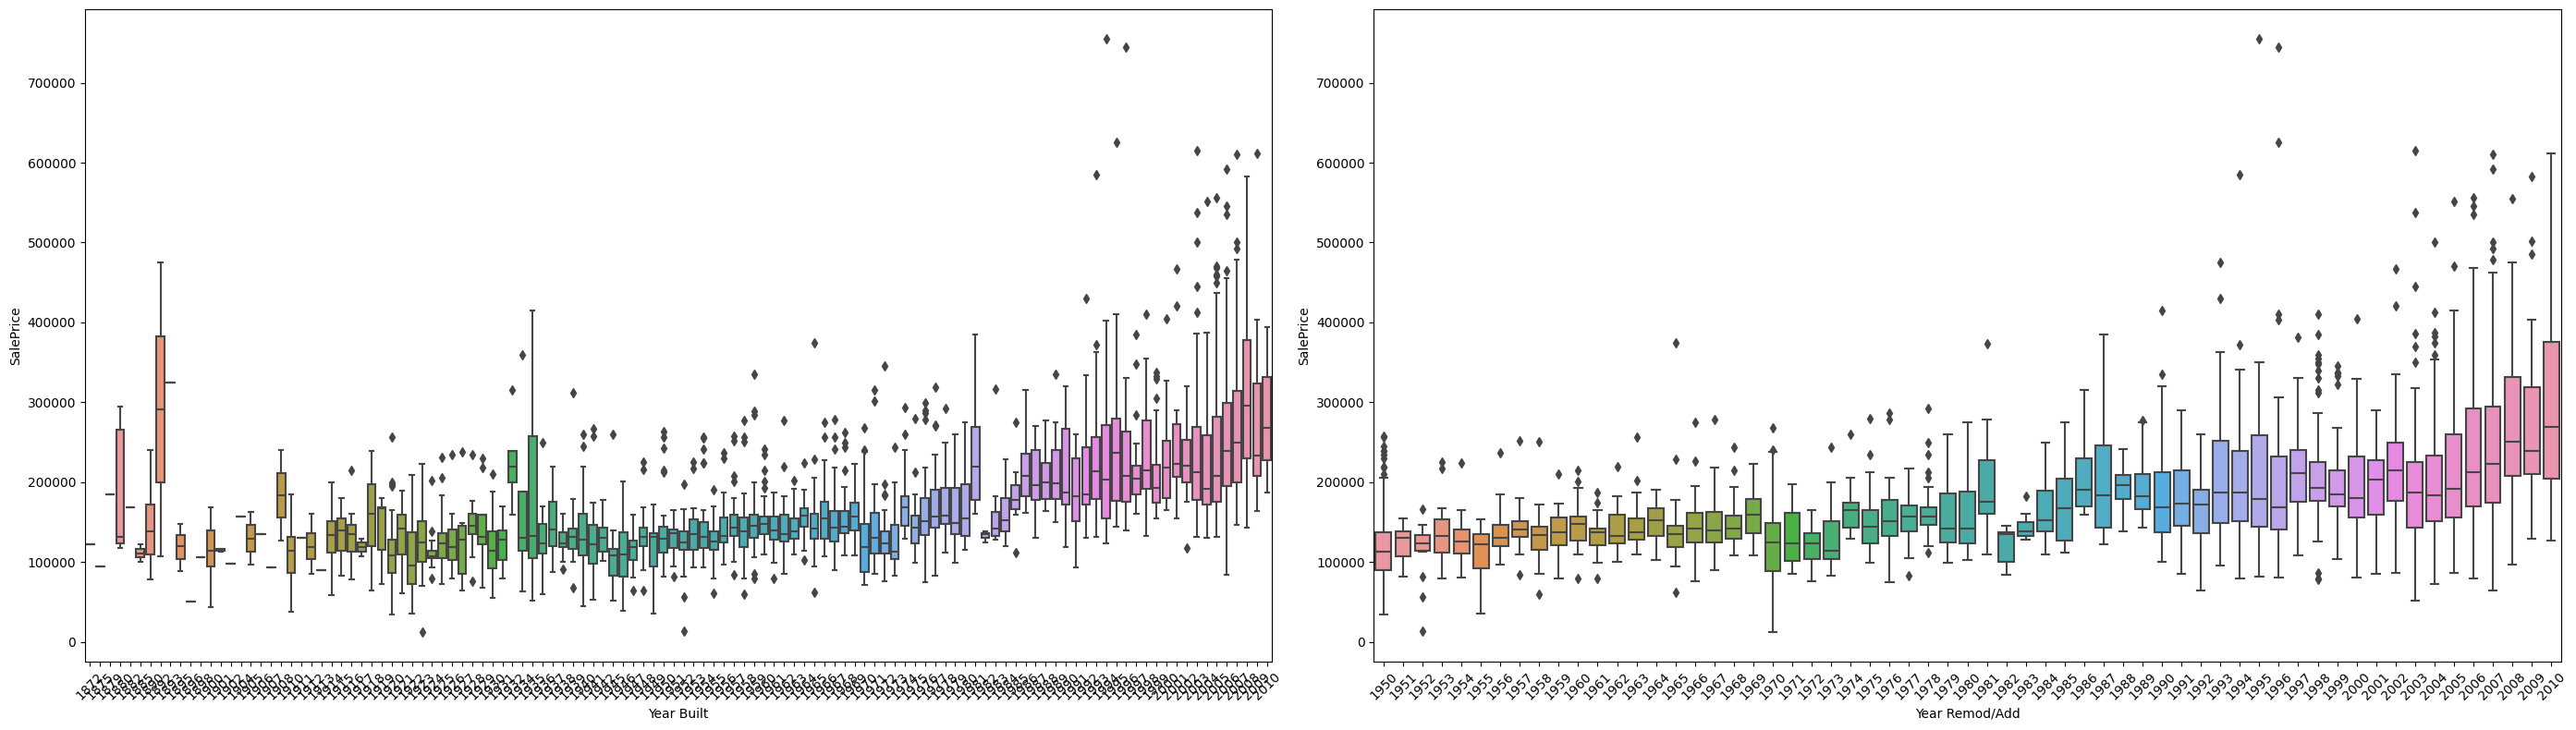

In [ ]:
plt.figure(figsize=(28, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=my_data, x='Year Built', y='SalePrice')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=my_data, x='Year Remod/Add', y='SalePrice')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Interior of the House

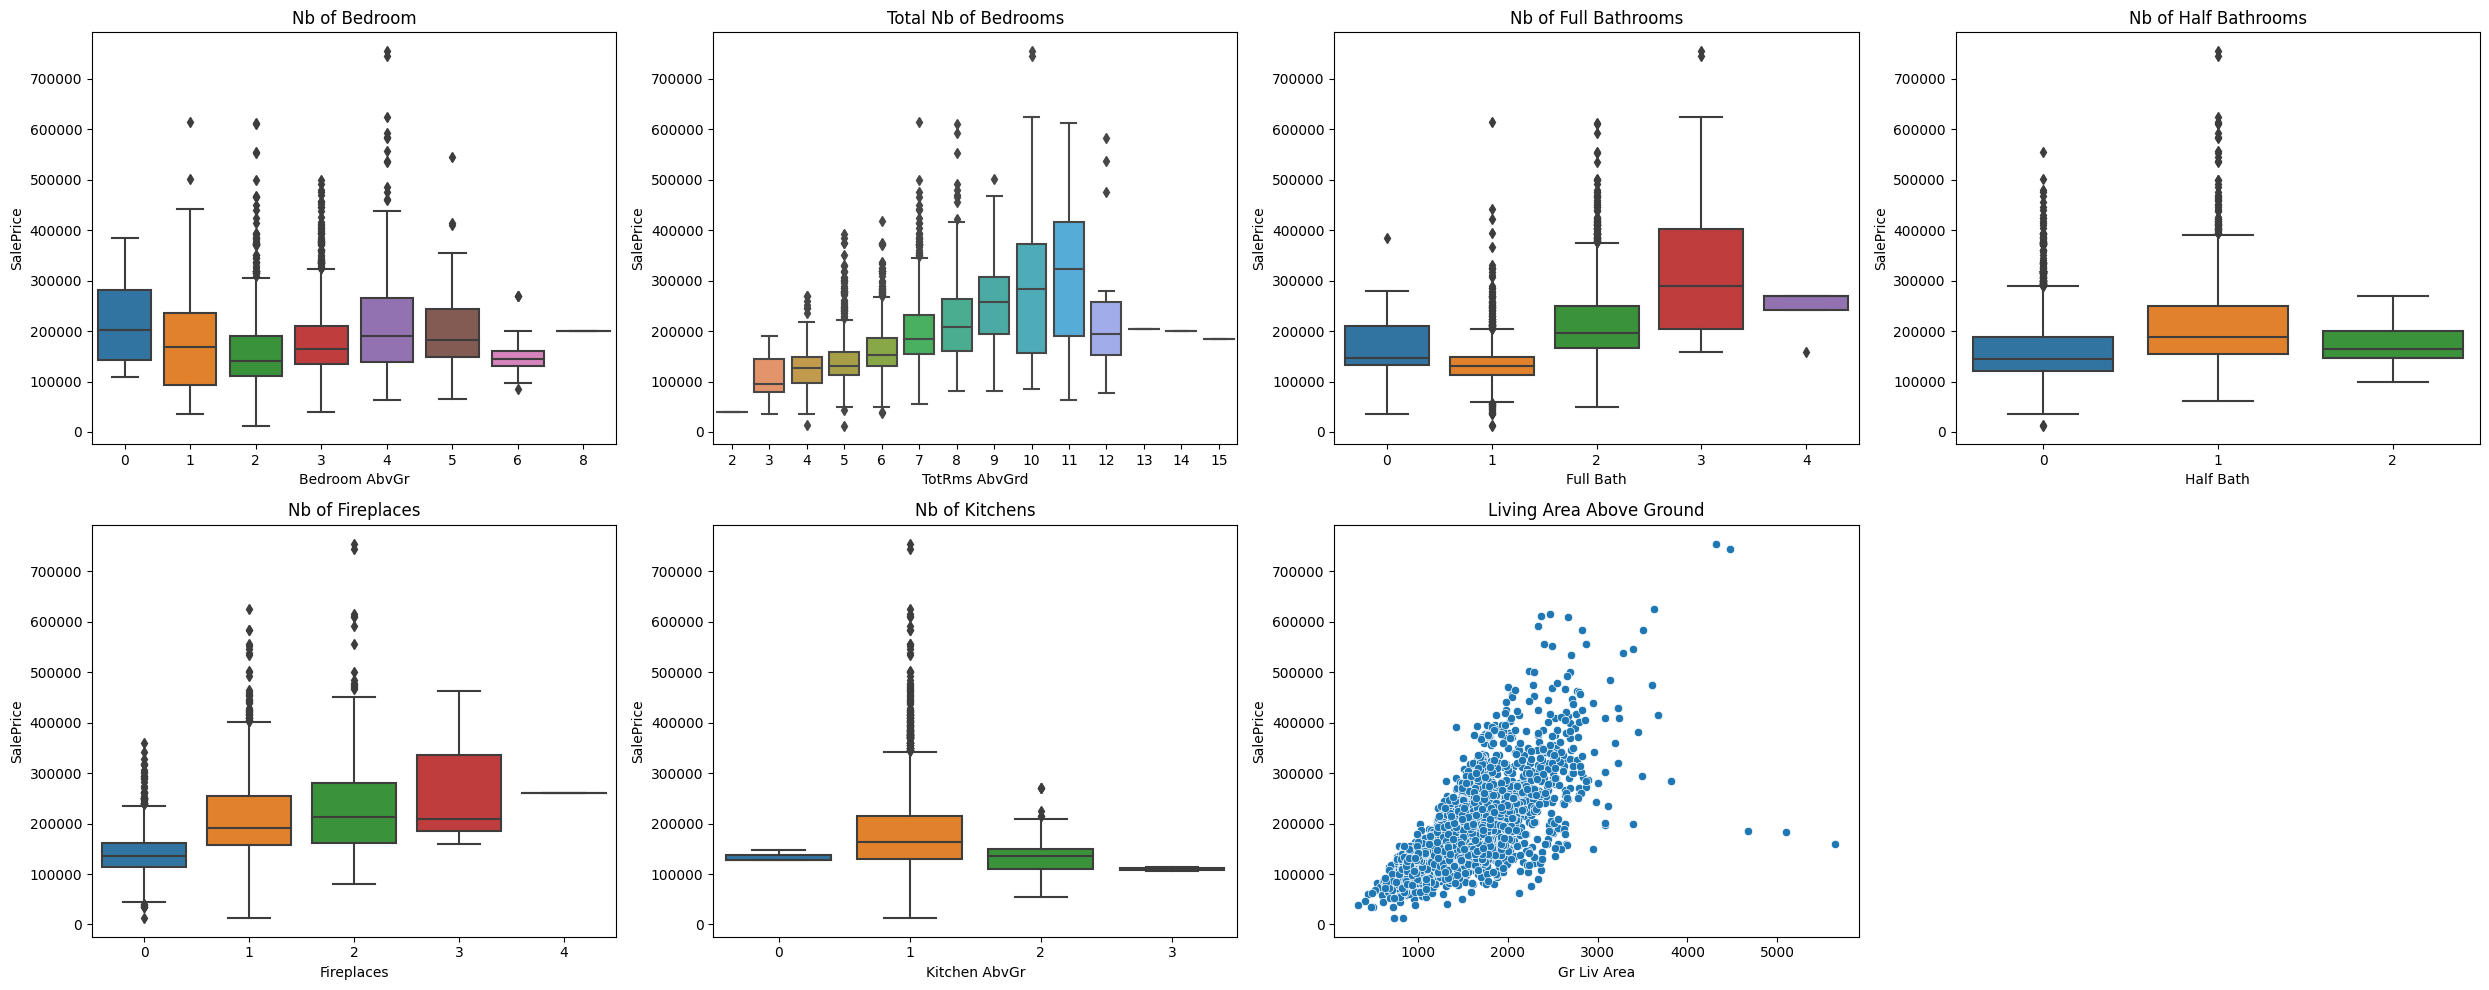

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.boxplot(data=my_data, x='Bedroom AbvGr', y='SalePrice', ax=axes[0, 0])
axes[0, 0].set_title('Nb of Bedroom')

sns.boxplot(data=my_data, x='TotRms AbvGrd', y='SalePrice', ax=axes[0, 1])
axes[0, 1].set_title('Total Nb of Bedrooms')

sns.boxplot(data=my_data, x='Full Bath', y='SalePrice', ax=axes[0, 2])
axes[0, 2].set_title('Nb of Full Bathrooms')

sns.boxplot(data=my_data, x='Half Bath', y='SalePrice', ax=axes[0, 3])
axes[0, 3].set_title('Nb of Half Bathrooms')

sns.boxplot(data=my_data, x='Fireplaces', y='SalePrice', ax=axes[1, 0])
axes[1, 0].set_title('Nb of Fireplaces')

sns.boxplot(data=my_data, x='Kitchen AbvGr', y='SalePrice', ax=axes[1, 1])
axes[1, 1].set_title('Nb of Kitchens')

sns.scatterplot(data=my_data, x='Gr Liv Area', y='SalePrice', ax=axes[1, 2])
axes[1, 2].set_title('Living Area Above Ground')

fig.delaxes(axes[1, 3])

plt.tight_layout()

plt.show()

## Basement

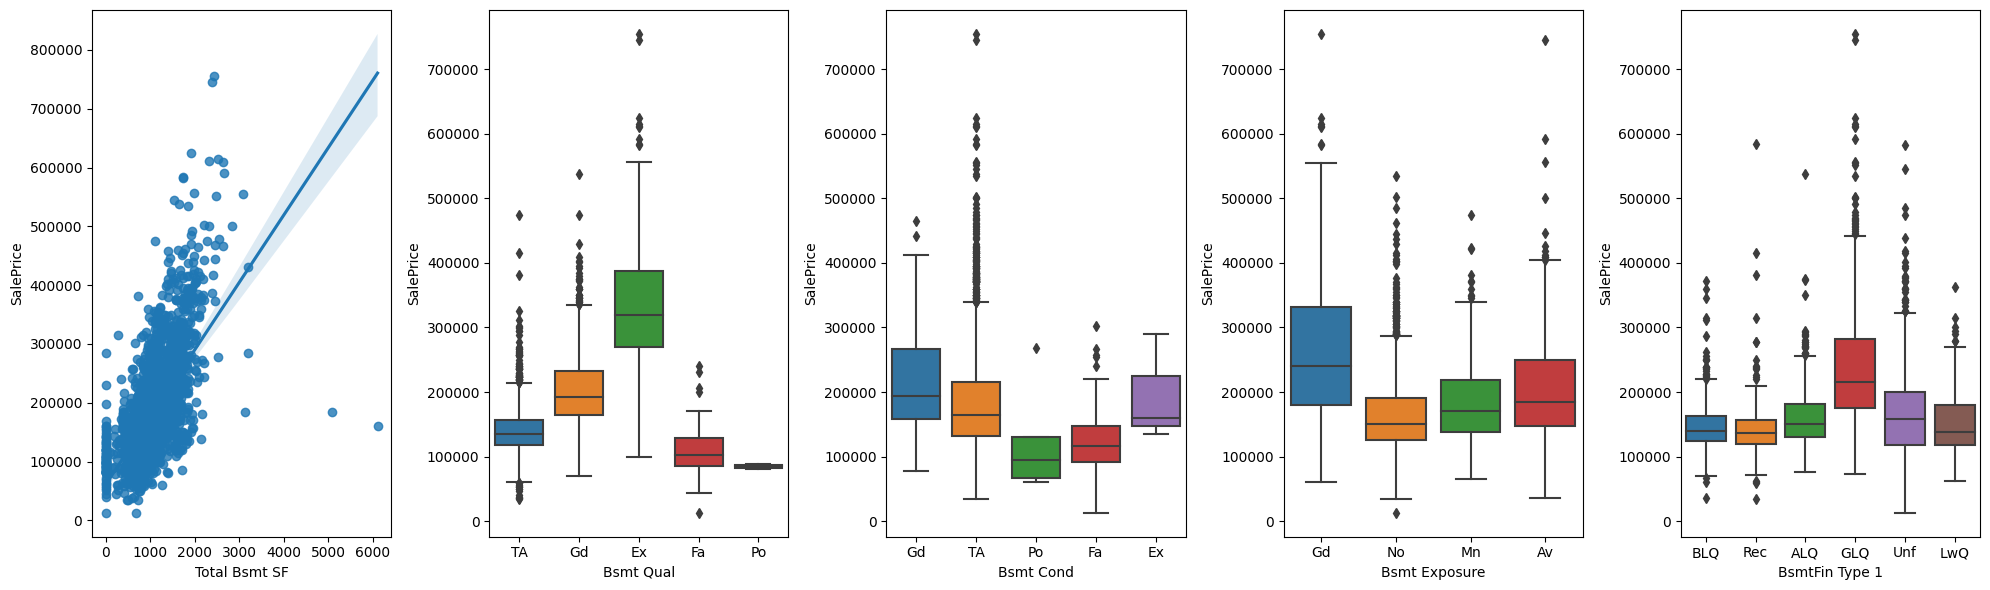

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 5, 1)
sns.regplot(data=my_data, x='Total Bsmt SF', y='SalePrice')

plt.subplot(1, 5, 2)
sns.boxplot(data=my_data, x='Bsmt Qual', y='SalePrice')

plt.subplot(1, 5, 3)
sns.boxplot(data=my_data, x='Bsmt Cond', y='SalePrice')

plt.subplot(1, 5, 4)
sns.boxplot(data=my_data, x='Bsmt Exposure', y='SalePrice')

plt.subplot(1, 5, 5)
sns.boxplot(data=my_data, x='BsmtFin Type 1', y='SalePrice')

plt.tight_layout()
plt.show()

# Data Cleaning 🧹

In [ ]:
# Check for Duplicates
len(my_data), len(my_data.drop_duplicates())

(2930, 2930)

In [6]:
# Delete variables with too much NaNs
for i in my_data.columns:
  if my_data[i].isna().sum() > 400:
    my_data.drop(i, axis=1, inplace=True)

In [7]:
len(my_data.columns)

76

In [8]:
# Remove Outliers
for i in range(len(my_data)):
  if (my_data['SalePrice'][i] < 300000) & (my_data['Mas Vnr Area'][i] > 1000):
      my_data.drop(i, axis=0, inplace = True)
my_data = my_data.reset_index(drop = True)

for i in range(len(my_data)):
  if (my_data['SalePrice'][i] < 300000) & (my_data['Total Bsmt SF'][i] > 5000):
      my_data.drop(i, axis=0, inplace = True)
my_data = my_data.reset_index(drop = True)

for i in range(len(my_data)):
  if (my_data['SalePrice'][i] < 300000) & (my_data['1st Flr SF'][i] > 3500):
      my_data.drop(i, axis=0, inplace = True)
my_data = my_data.reset_index(drop = True)

for i in range(len(my_data)):
  if (my_data['SalePrice'][i] < 300000) & (my_data['Wood Deck SF'][i] > 1400):
      my_data.drop(i, axis=0, inplace = True)
my_data = my_data.reset_index(drop = True)

In [9]:
len(my_data) # 12 outliers rempoved

2918

# Feature Engineering 🪛

In [10]:
def recoding(df):

  df['Street'] = [1 if street == 'Pave' else 0 if street == 'Grvl' else None for street in df["Street"]]

  df['Alley'] = [2 if street == 'Pave' else 1 if street == 'Grvl' else 0 for street in df["Street"]]

  df['Lot Shape'] = [3 if shape == 'Reg' else 2 if shape == 'IR1' else 1 if shape == 'IR2' else 0 if shape == 'IR3' else None for shape in df["Lot Shape"]]

  df['Land Contour'] = [3 if contour == 'Lvl' else 2 if contour == 'Bnk' else 1 if contour == 'HLS' else 0 if contour == 'Low' else None for contour in df["Land Contour"]]

  df['Land Slope'] = [2 if slope == 'Gtl' else 1 if slope == 'Mod' else 0 if slope == 'Sev' else None for slope in df["Land Slope"]]

  df['Neighborhood'] = [1 if nbrd in ['StoneBr', 'NridgHt', 'NoRidge'] else 0 for nbrd in df["Neighborhood"]]

  df['Condition 1'] = [2 if cond1 in ['PosN', 'PosA'] else 1 if cond1 in ['Norm', 'RRNn', 'RRNe']  else 0 for cond1 in df["Condition 1"]]

  df['Bldg Type'] = [4 if blgt == '1Fam'  else 3 if blgt == '2FmCon' else 2 if blgt == 'TwnhsE' else 1 if blgt == 'Duplx'  else 0 for blgt in df["Bldg Type"]]

  df['Exter Qual'] = [4 if exqual == 'Ex' else 3 if exqual == 'Gd' else 2 if exqual == 'TA' else 1 if exqual == 'Fa' else 0 for exqual in df["Exter Qual"]]

  df['Exter Cond'] = [4 if excond == 'Ex' else 3 if excond == 'Gd' else 2 if excond == 'TA' else 1 if excond == 'Fa' else 0 for excond in df["Exter Cond"]]

  df['Foundation'] = [1 if fond in ['PConc', 'Wood'] else 0 for fond in df["Foundation"]]

  df['Bsmt Qual'] = [4 if btqual == 'Ex' else 3 if btqual == 'Gd' else 2 if btqual == 'TA' else 1 if btqual == 'Fa' else 0 if btqual == 'Po' else -1 for btqual in df["Bsmt Qual"]]

  df['Bsmt Cond'] = [4 if btcond == 'Ex' else 3 if btcond == 'Gd' else 2 if btcond == 'TA' else 1 if btcond == 'Fa' else 0 if btcond == 'Po' else -1 for btcond in df["Bsmt Cond"]]

  df['Bsmt Exposure'] = [4 if btexp == 'Gd' else 3 if btexp == 'Av' else 2 if btexp == 'Mn' else 1 if btexp == 'No' else -1 for btexp in df["Bsmt Exposure"]]

  df['BsmtFin Type 1'] = [6 if bsmtfin1 == 'GLQ' else 5 if bsmtfin1 == 'ALQ' else 4 if bsmtfin1 == 'BLQ' else 3 if bsmtfin1 == 'Rec' else 2 if bsmtfin1 == 'LwQ' else 1 if bsmtfin1 == 'Unf' else -1 for bsmtfin1 in df["BsmtFin Type 1"]]

  df['Heating QC'] = [4 if heat == 'Ex' else 3 if heat == 'Gd' else 2 if heat == 'TA' else 1 if heat == 'Fa' else 0 for heat in df["Heating QC"]]

  df['Central Air'] = [1 if cent == 'Y' else 0 for cent in df["Central Air"]]

  df['Electrical'] = [4 if elec == 'SBrkr' else 3 if elec == 'FuseA' else 2 if elec == 'FuseF' else 1 if elec == 'FuseP' else 0 for elec in df["Electrical"]]

  df['Kitchen Qual'] = [4 if kitqual == 'Ex' else 3 if kitqual == 'Gd' else 2 if kitqual == 'TA' else 1 if kitqual == 'Fa' else 0 for kitqual in df["Kitchen Qual"]]

  df['Functional'] = [7 if func == 'Typ' else 6 if func == 'Min1' else 5 if func == 'Min2' else 4 if func == 'Mod' else 3 if func == 'Maj1' else 2 if func == 'Maj2' else 1 if func == 'Sev' else 0 for func in df["Functional"]]

  df['Garage Finish'] = [ 2 if garfin == 'Fin' else 1 if garfin == 'RFn' else 0 if garfin == 'Unf' else -1 for garfin in df['Garage Finish']]

  df['Garage Qual'] = [ 4 if garqu == 'Ex' else 3 if garqu == 'Gd' else 2 if garqu == 'TA' else 1 if garqu == 'Fa' else 0 if garqu == 'Po' else -1 for garqu in df['Garage Qual']]

  df['Garage Cond'] = [ 4 if garcond == 'Ex' else 3 if garcond == 'Gd' else 2 if garcond == 'TA' else 1 if garcond == 'Fa' else 0 if garcond == 'Po' else -1 for garcond in df['Garage Cond']]

  df['Paved Drive'] = [ 2 if pavdri == 'Y' else 1 if pavdri == 'P' else 0 if pavdri == 'N' else None for pavdri in df['Paved Drive']]

recoding(my_data)

In [11]:
def new_features(df):
    # Compute the total area
    df['Total Area'] = df['Total Bsmt SF'] + df['Gr Liv Area']

    # Compute the number of new or renovated bathrooms
    df['Total Bathrooms'] = df['Full Bath'] + df['Half Bath']*0.5 + df["Bsmt Half Bath"]*0.5 + df["Bsmt Full Bath"]

    # Compute the total room count
    df['Total Rooms'] = df['Bedroom AbvGr'] + df['TotRms AbvGrd']

    # Has pool?
    df['Has Pool'] = [1 if pool > 0 else 0 for pool in df["Pool Area"]]

    # Compute the total porch area
    df['Total Porch Area'] = df['Open Porch SF'] + df['Enclosed Porch'] + \
                            df["3Ssn Porch"] + df["Screen Porch"] + df["Wood Deck SF"]

    # Has Garage?
    df['Has Garage'] = [1 if gar > 0 else 0 for gar in df["Garage Yr Blt"]]

    # House Overall (grade /20)
    df['Overall'] = df['Overall Qual'] + df['Overall Cond']

    # House Exter (grade /8)
    df['Exter'] = df['Exter Qual'] + df['Exter Cond']

    # Basement Exter (grade /8)
    df['Bsmt'] = df['Bsmt Qual'] + df['Bsmt Cond']

    # Basement Exter (grade /8)
    df['Garage'] = df['Garage Qual'] + df['Garage Cond']

    # Log of the price
    df['Log SalePrice'] = np.log(df['SalePrice'])

    # Age of the house
    df['Age House'] = 2023 - df['Year Built']

    # Time since renovation
    df['Last Renov'] = 2023 - df['Year Remod/Add']

new_features(my_data)

In [12]:
len(my_data.columns)

90

In [13]:
my_data.corr()['SalePrice'].sort_values(ascending = False, ).to_frame().T

,SalePrice,Log SalePrice,Total Area,Overall Qual,Gr Liv Area,Exter Qual,Kitchen Qual,Total Bsmt SF,Garage Cars,1st Flr SF,Garage Area,Total Bathrooms,Bsmt Qual,Neighborhood,Exter,Overall,Year Built,Garage Finish,Full Bath,Mas Vnr Area,Year Remod/Add,Garage Yr Blt,Foundation,Bsmt,TotRms AbvGrd,Fireplaces,Heating QC,BsmtFin SF 1,Bsmt Exposure,Total Rooms,Total Porch Area,BsmtFin Type 1,Wood Deck SF,Open Porch SF,Half Bath,Bsmt Full Bath,Garage Qual,Paved Drive,Garage,2nd Flr SF,Lot Area,Central Air,Garage Cond,Electrical,Has Garage,Bsmt Cond,Condition 1,Bsmt Unf SF,Bldg Type,Bedroom AbvGr,Functional,Screen Porch,Has Pool,Pool Area,Street,Mo Sold,3Ssn Porch,Exter Cond,BsmtFin SF 2,Misc Val,Yr Sold,Order,Bsmt Half Bath,Low Qual Fin SF,Land Slope,MS SubClass,Overall Cond,Land Contour,Kitchen AbvGr,Enclosed Porch,PID,Lot Shape,Last Renov,Age House,Alley
SalePrice,1.0,0.946242,0.82335,0.803111,0.724075,0.701643,0.674584,0.660991,0.648917,0.646406,0.644761,0.63829,0.612059,0.594454,0.594011,0.593642,0.559454,0.550874,0.545349,0.536742,0.533377,0.528394,0.522488,0.504862,0.498923,0.475812,0.451159,0.450658,0.417039,0.406099,0.38925,0.343728,0.334737,0.315818,0.285437,0.278169,0.277871,0.27584,0.273485,0.270638,0.269248,0.264421,0.261717,0.229172,0.225465,0.215388,0.194733,0.183412,0.153103,0.142599,0.121627,0.111293,0.093111,0.072004,0.059486,0.034871,0.032405,0.020977,0.006388,-0.019187,-0.030312,-0.031752,-0.035761,-0.037552,-0.066817,-0.084541,-0.103505,-0.11495,-0.119644,-0.128397,-0.247335,-0.293142,-0.533377,-0.559454,NaN


In [14]:
# Drop columns that are too correlated, > 0,85
corr_matrix = my_data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

my_data = my_data.drop(columns=to_drop)

In [15]:
len(my_data.columns)

81

In [16]:
my_data.corr()['SalePrice'].sort_values(ascending = False).to_frame().T

,SalePrice,Overall Qual,Gr Liv Area,Exter Qual,Kitchen Qual,Total Bsmt SF,Garage Cars,1st Flr SF,Total Bathrooms,Bsmt Qual,Neighborhood,Exter,Overall,Year Built,Garage Finish,Full Bath,Mas Vnr Area,Year Remod/Add,Garage Yr Blt,Foundation,TotRms AbvGrd,Fireplaces,Heating QC,BsmtFin SF 1,Bsmt Exposure,Total Porch Area,BsmtFin Type 1,Wood Deck SF,Open Porch SF,Half Bath,Bsmt Full Bath,Garage Qual,Paved Drive,2nd Flr SF,Lot Area,Central Air,Electrical,Bsmt Cond,Condition 1,Bsmt Unf SF,Bldg Type,Bedroom AbvGr,Functional,Screen Porch,Pool Area,Street,Mo Sold,3Ssn Porch,Exter Cond,BsmtFin SF 2,Misc Val,Yr Sold,Order,Bsmt Half Bath,Low Qual Fin SF,Land Slope,MS SubClass,Overall Cond,Land Contour,Kitchen AbvGr,Enclosed Porch,PID,Lot Shape,Last Renov,Age House,Alley
SalePrice,1.0,0.803111,0.724075,0.701643,0.674584,0.660991,0.648917,0.646406,0.63829,0.612059,0.594454,0.594011,0.593642,0.559454,0.550874,0.545349,0.536742,0.533377,0.528394,0.522488,0.498923,0.475812,0.451159,0.450658,0.417039,0.38925,0.343728,0.334737,0.315818,0.285437,0.278169,0.277871,0.27584,0.270638,0.269248,0.264421,0.229172,0.215388,0.194733,0.183412,0.153103,0.142599,0.121627,0.111293,0.072004,0.059486,0.034871,0.032405,0.020977,0.006388,-0.019187,-0.030312,-0.031752,-0.035761,-0.037552,-0.066817,-0.084541,-0.103505,-0.11495,-0.119644,-0.128397,-0.247335,-0.293142,-0.533377,-0.559454,NaN


In [17]:
my_data.isna().sum().to_frame().T

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Alley,Total Bathrooms,Total Porch Area,Overall,Exter,Age House,Last Renov
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,0,0,0,0,0,0,0,1,80,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,157,159,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Modeling ⚡

In [18]:
numeric_data = my_data.select_dtypes(include = 'number')

In [19]:
numeric_data.corr()['SalePrice'].to_frame().T

,Order,PID,MS SubClass,Lot Area,Street,Lot Shape,Land Contour,Land Slope,Neighborhood,Condition 1,Bldg Type,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Alley,Total Bathrooms,Total Porch Area,Overall,Exter,Age House,Last Renov
SalePrice,-0.031752,-0.247335,-0.084541,0.269248,0.059486,-0.293142,-0.11495,-0.066817,0.594454,0.194733,0.153103,0.803111,-0.103505,0.559454,0.533377,0.536742,0.701643,0.020977,0.522488,0.612059,0.215388,0.417039,0.343728,0.450658,0.006388,0.183412,0.660991,0.451159,0.264421,0.229172,0.646406,0.270638,-0.037552,0.724075,0.278169,-0.035761,0.545349,0.285437,0.142599,-0.119644,0.674584,0.498923,0.121627,0.475812,0.528394,0.550874,0.648917,0.277871,0.27584,0.334737,0.315818,-0.128397,0.032405,0.111293,0.072004,-0.019187,0.034871,-0.030312,1.0,NaN,0.63829,0.38925,0.593642,0.594011,-0.559454,-0.533377


In [20]:
len(numeric_data.columns)

66

In [21]:
for i in numeric_data.columns:
  if abs(numeric_data.corr()['SalePrice'][i]) < 0.3:
    numeric_data.drop(columns = [str(i)], inplace = True)

In [22]:
numeric_data.columns

Index(['Neighborhood', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'Alley',
       'Total Bathrooms', 'Total Porch Area', 'Overall', 'Exter', 'Age House',
       'Last Renov'],
      dtype='object')

In [23]:
# Train Test Split
numeric_data.dropna(inplace=True)
X = numeric_data.drop(columns = ['SalePrice', 'Alley', 'Garage Yr Blt'])
y = numeric_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Length of Train Data : ' , len(X_train))
print('Length of Test Data : ' , len(X_test))

Length of Train Data :  1915
Length of Test Data :  821


### Linear Regression as Benchmark

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
pred_test_linreg = linear_reg.predict(X_test)

In [26]:
print('MAE of the model :', mean_absolute_error(y_test, pred_test_linreg))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test, pred_test_linreg)))
print(f'R²: {r2_score(y_test, pred_test_linreg)}')
print('Percentage of error :', f"{np.mean(abs(pred_test_linreg - y_test)/abs(y_test)*100):.2f}", '%')

MAE of the model : 19092.55309810757
RMSE of the model : 27847.19484924659
R²: 0.8863915648459326
Percentage of error : 10.91 %


<Axes: xlabel='SalePrice', ylabel='Count'>

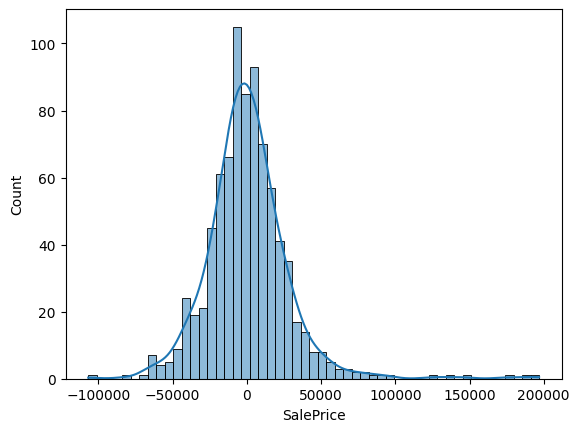

In [27]:
# Check normality of the residuals
residuals = y_test - pred_test_linreg
residuals = residuals.sort_values(ascending = True)

sns.histplot(residuals, kde=True)

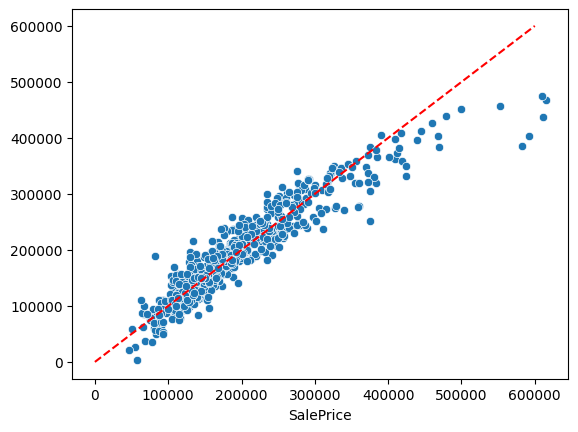

In [28]:
sns.scatterplot(x = y_test, y = pred_test_linreg)
plt.plot([0, 600000], [0, 600000], linestyle='--', color='red')

### Lasso Regression Model

In [29]:
lasso = Lasso(alpha=0.1)

# Train the model
lasso.fit(X_train, y_train)

# Predict the test set
pred_test_lasso = lasso.predict(X_test)

In [30]:
print('MAE of the model :', mean_absolute_error(y_test, pred_test_lasso))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
print(f'R²: {r2_score(y_test, pred_test_lasso)}')
print('Percentage of error :', f"{np.mean(abs(pred_test_lasso - y_test)/abs(y_test)*100):.2f}", '%')

MAE of the model : 19092.506298791173
RMSE of the model : 27847.190693100587
R²: 0.8863915987576577
Percentage of error : 10.91 %


### Random Forest Regressor

In [31]:
rf= RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
pred_test_rf = rf.predict(X_test)

In [33]:
print('MAE of the model :', mean_absolute_error(y_test, pred_test_rf))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test, pred_test_rf)))
print(f'R²: {r2_score(y_test, pred_test_rf)}')
print('Percentage of error :', f"{np.mean(abs(pred_test_rf - y_test)/abs(y_test)*100):.2f}", '%')

MAE of the model : 16594.56647816252
RMSE of the model : 26231.50661109567
R²: 0.8991921990984691
Percentage of error : 9.16 %


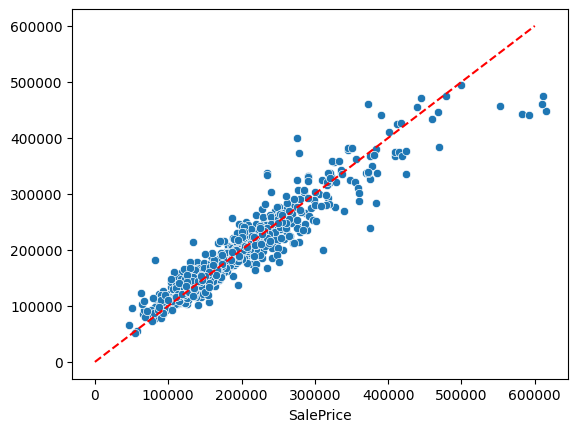

In [34]:
sns.scatterplot(x = y_test, y = pred_test_rf)
plt.plot([0, 600000], [0, 600000], linestyle='--', color='red')

### Fine Tuning the RF

In [35]:
parameters = {
    'n_estimators': [100, 300, 1000],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf' : [2, 5, 10],
    'bootstrap': [True, False]
}

tuned_rf = GridSearchCV(rf, parameters)
tuned_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [100, 300, 1000]})

In [36]:
pred_test_rf_tuned = tuned_rf.best_estimator_.predict(X_test)

In [38]:
print('MAE of the model :', mean_absolute_error(y_test, pred_test_rf_tuned))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test, pred_test_rf_tuned)))
print(f'R²: {r2_score(y_test, pred_test_rf_tuned)}')
print('Percentage of error :', f"{np.mean(abs(pred_test_rf_tuned - y_test)/abs(y_test)*100):.2f}", '%')

MAE of the model : 16492.834852979187
RMSE of the model : 25904.294108675425
R²: 0.901691471582643
Percentage of error : 9.11 %


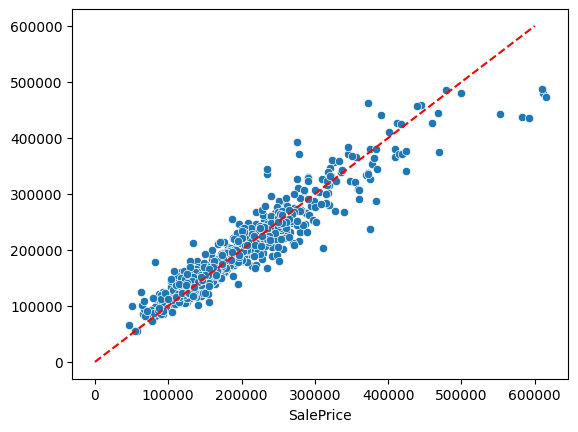

In [ ]:
sns.scatterplot(x = y_test, y = pred_test_rf_tuned)
plt.plot([0, 600000], [0, 600000], linestyle='--', color='red')

## Explainability of the Tuned RF

In [ ]:
explainer = shap.Explainer(tuned_rf.best_estimator_, X_test)
shap_values = explainer(X_test)

100%|===================| 818/821 [00:20<00:00]       

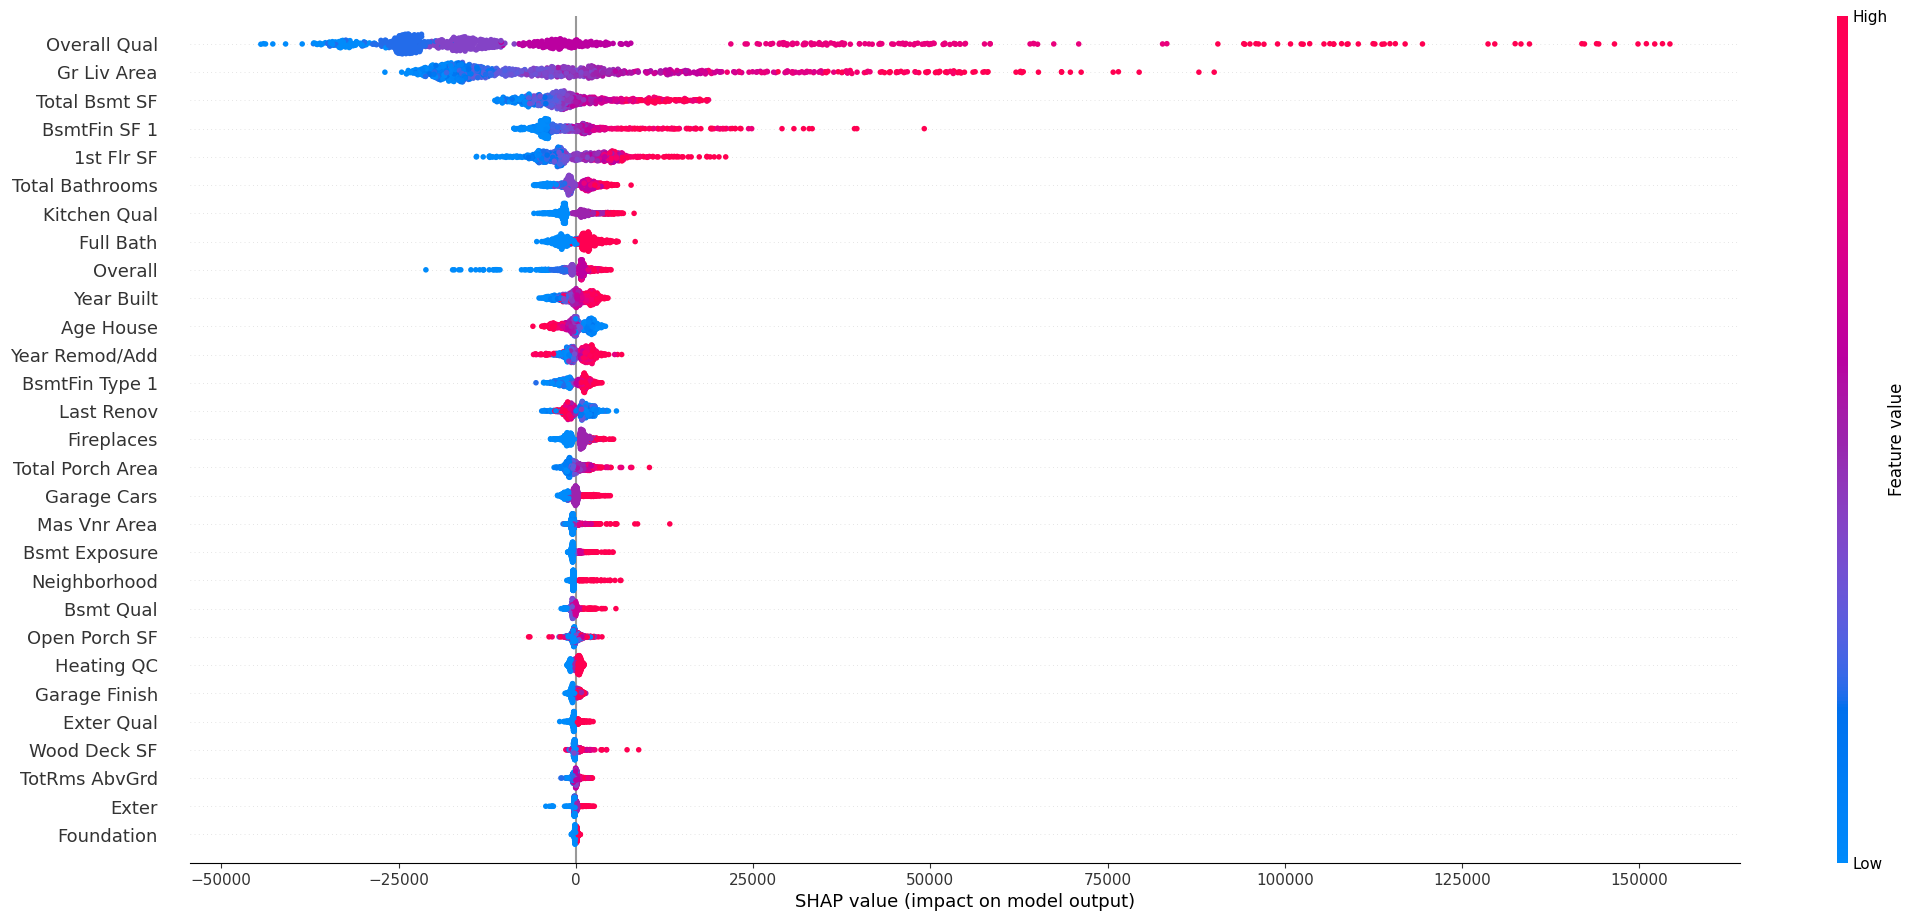

In [ ]:
shap.plots.beeswarm(shap_values, plot_size=[25, 11], max_display=31)

### Let us find a 'Good' and a 'Bad' House to compare shap values

In [ ]:
X_test['act'] = y_test
X_test.reset_index(inplace=True)

In [ ]:
X_test[X_test.act == 615000]

,index,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Finish,Garage Cars,Wood Deck SF,Open Porch SF,Total Bathrooms,Total Porch Area,Overall,Exter,Age House,Last Renov,act
263,1062,1,10,2003,2003,680.0,4,1,4,4,6,2257.0,2535.0,4,2470,2470,1,4,7,2,2,3.0,154,65,3.5,435,15,6,20,20,615000


In [ ]:
X_test[X_test.act == 46500]

,index,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Finish,Garage Cars,Wood Deck SF,Open Porch SF,Total Bathrooms,Total Porch Area,Overall,Exter,Age House,Last Renov,act
718,1299,0,2,1946,1950,0.0,2,0,2,1,1,0.0,407.0,2,407,407,1,2,3,0,0,1.0,76,0,1.0,196,7,5,77,73,46500


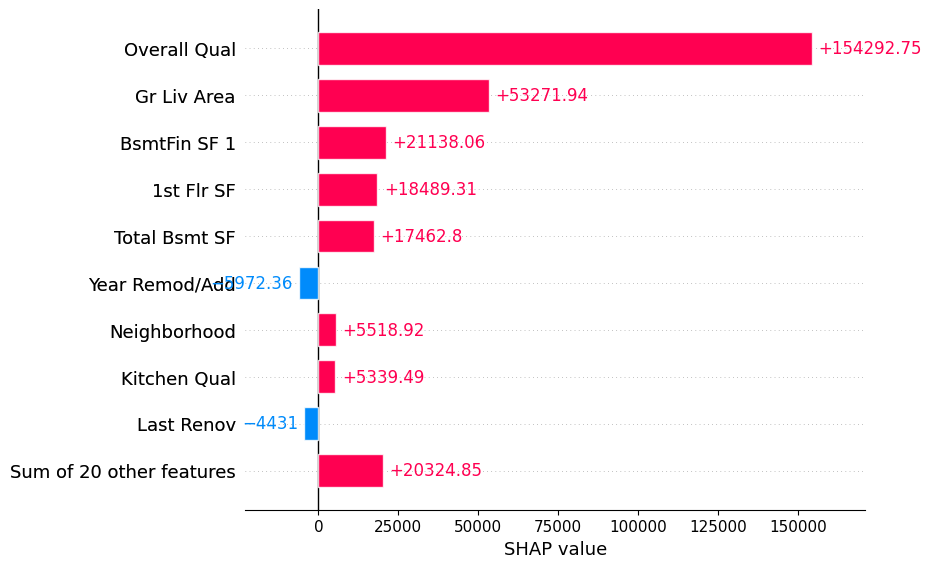

In [ ]:
# These are the SHAP values for the 'Good' House
shap.plots.bar(shap_values[263])

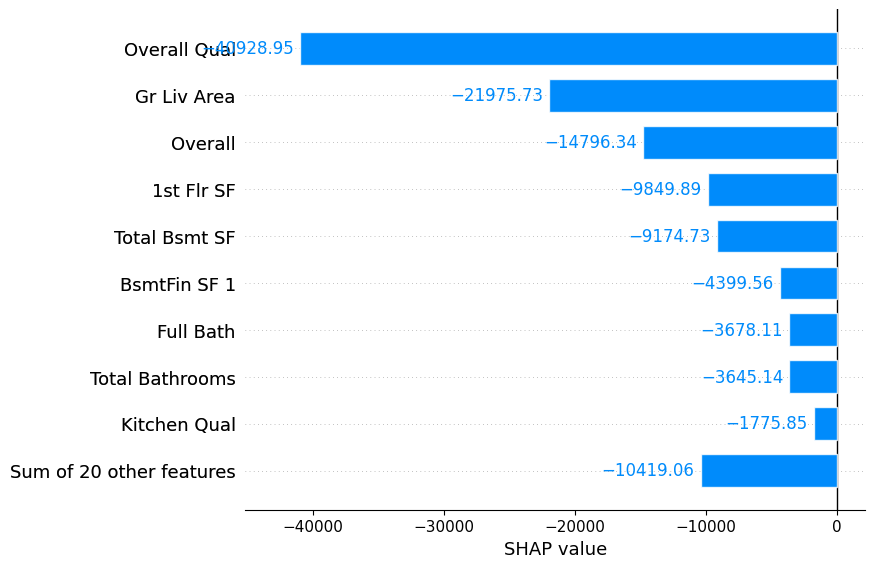

In [ ]:
# These are the SHAP values for the 'Bad' House
shap.plots.bar(shap_values[718])